<a href="https://colab.research.google.com/github/Akhil9037/Galaxies/blob/main/spectra_analysis_0282.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

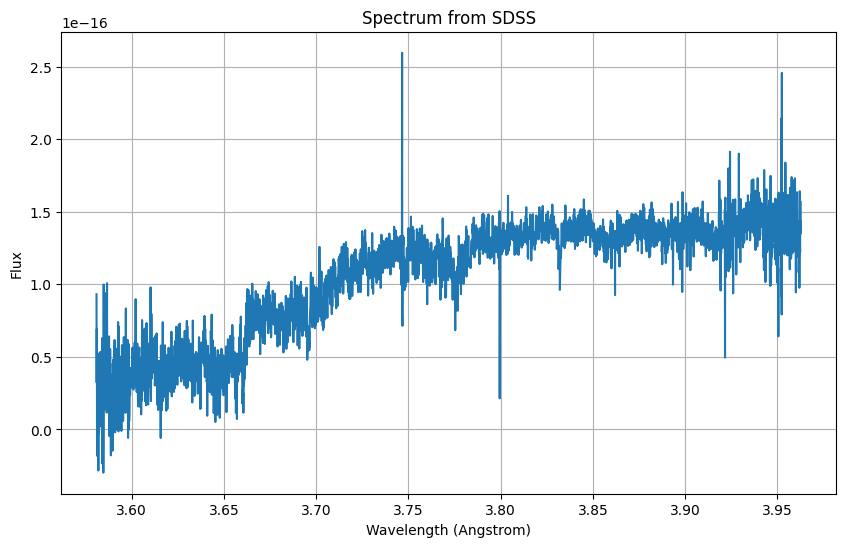

Emission Lines: [3.581  3.5849 3.586  ... 3.9626 3.9627 3.9628] Angstrom
Absorption Lines: [3.5811 3.5812 3.5813 ... 3.9216 3.9505 3.9523] Angstrom


In [17]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy import units as u

# Load the FITS file
filename = 'https://data.sdss.org/sas/dr17/sdss/spectro/redux/26/spectra/lite/1733/spec-1733-53047-0282.fits'
hdul = fits.open(filename)

# Extract data from HDU
data = hdul[1].data
wavelengths = data['loglam']* u.AA
flux = data['flux']* 10**-17 * u.Unit('erg cm-2 s-1 AA-1')

# Plotting the spectrum
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, flux)
plt.title('Spectrum from SDSS')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.grid()
plt.show()

# Identify emission/absorption lines (simple thresholding)
threshold = np.mean(flux) * 0.8  # Example threshold for absorption
emission_lines = wavelengths[flux > threshold]
absorption_lines = wavelengths[flux < threshold]

print("Emission Lines:", emission_lines)
print("Absorption Lines:", absorption_lines)

# Close the FITS file
hdul.close()


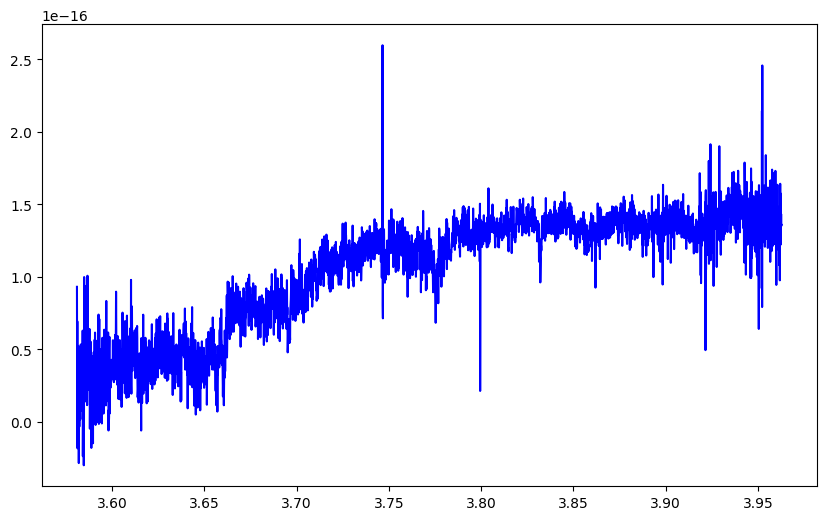

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib.pyplot as plt
# Load the FITS file
fits_file = 'https://data.sdss.org/sas/dr17/sdss/spectro/redux/26/spectra/lite/1733/spec-1733-53047-0282.fits'
hdul = fits.open(fits_file)

# Extract data from the first extension
data = hdul[1].data

# Wavelengths and fluxes
wavelengths = data['loglam']* u.AA
flux = data['flux']* 10**-17 * u.Unit('erg cm-2 s-1 AA-1')

# Identify emission and absorption lines based on thresholding
threshold = np.mean(flux)  # Simple thresholding method
emission_lines = wavelengths[flux > threshold]
absorption_lines = wavelengths[flux < threshold]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(wavelengths, flux, label='Spectrum', color='blue')
#plt.subplot(1,1)


# Close the FITS file
hdul.close()

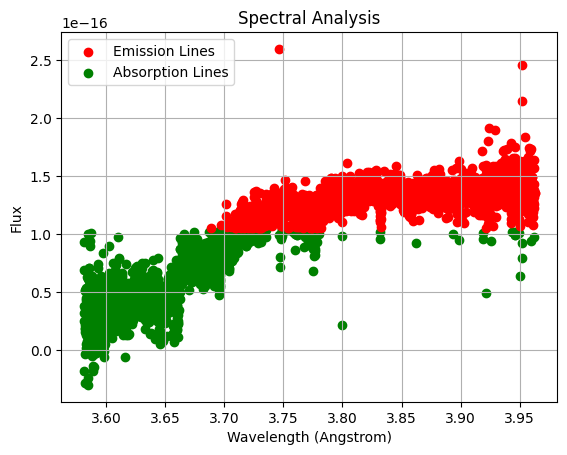

In [19]:
plt.scatter(emission_lines, flux[flux > threshold], color='red', label='Emission Lines', zorder=0.0001)
plt.scatter(absorption_lines, flux[flux < threshold], color='green', label='Absorption Lines', zorder=0.00001)
plt.title('Spectral Analysis')
plt.xlabel('Wavelength (Angstrom)')
plt.ylabel('Flux')
plt.legend()
plt.grid()
plt.show()